# LSTM Train - Kaza - No PCA

In [1]:
import pandas as pd
import sys
from pathlib import Path
sys.path.append('../..')
from src import config
from src.utils.dataset import TrafficDataset
from src.utils.model import TrafficPredictor
from torch.utils.data import DataLoader, random_split

In [2]:
DATASET_PATH = config.DATA_KAZA   
jsonl_file = DATASET_PATH / "data.jsonl"
if jsonl_file.exists():
    df = pd.read_json(jsonl_file, lines=True)
    if "traffic_sequence" in df.columns:
        df = pd.DataFrame(df["traffic_sequence"].tolist())
else:
    df = pd.read_parquet(DATASET_PATH)
df = df.fillna(0)
X_STEP, Y_STEP = 2, 1
data_array = df.values

Epoch 1/100  Train Loss: 27755.8473  Val Loss: 27947.2067  Val MSE: 27926.9102  Val R2: -0.1693
Epoch 2/100  Train Loss: 27528.9206  Val Loss: 27732.2471  Val MSE: 27712.0332  Val R2: -0.1603
Epoch 3/100  Train Loss: 27320.7195  Val Loss: 27531.0345  Val MSE: 27510.9043  Val R2: -0.1519
Epoch 4/100  Train Loss: 27129.2248  Val Loss: 27336.8971  Val MSE: 27316.8574  Val R2: -0.1437
Epoch 5/100  Train Loss: 26942.9103  Val Loss: 27147.8105  Val MSE: 27127.8633  Val R2: -0.1358
Epoch 6/100  Train Loss: 26748.1231  Val Loss: 26962.8324  Val MSE: 26942.9766  Val R2: -0.1281
Epoch 7/100  Train Loss: 26571.3914  Val Loss: 26781.2946  Val MSE: 26761.5254  Val R2: -0.1205
Epoch 8/100  Train Loss: 26396.1820  Val Loss: 26602.8610  Val MSE: 26583.1797  Val R2: -0.1130
Epoch 9/100  Train Loss: 26215.4535  Val Loss: 26427.3574  Val MSE: 26407.7637  Val R2: -0.1057
Epoch 10/100  Train Loss: 26046.1397  Val Loss: 26254.4066  Val MSE: 26234.9004  Val R2: -0.0984
Epoch 11/100  Train Loss: 25876.7573  V

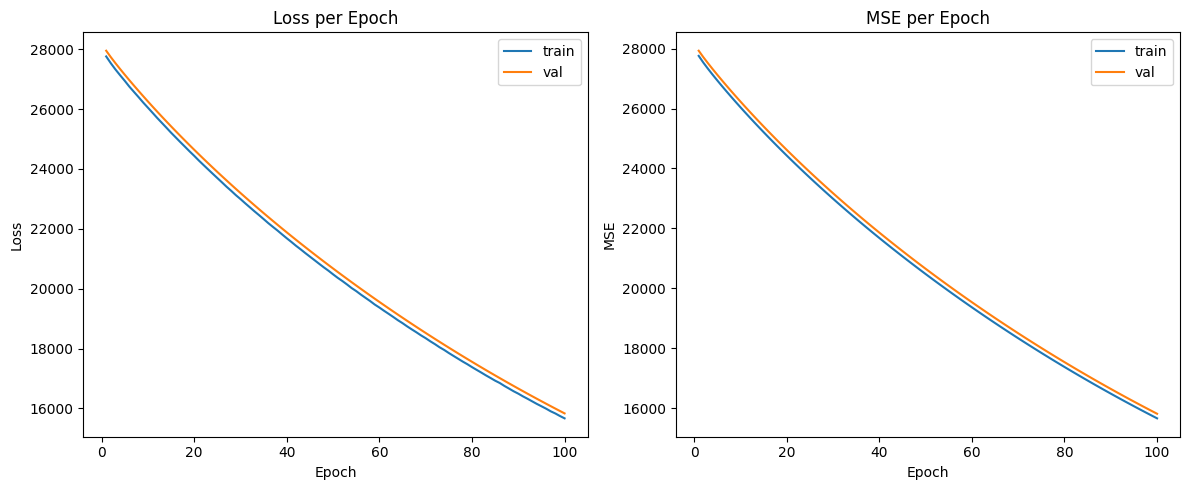

== Final Metrics ==
mse: 15821.830078125
mae: 54.2379264831543
r2: 0.3375556468963623


In [4]:
# PCA kullanılmıyor
dataset = TrafficDataset(data_array, X_STEP, Y_STEP)
train_len = int(len(dataset) * 0.8)
val_len = len(dataset) - train_len
train_ds, val_ds = random_split(dataset, [train_len, val_len])
train_loader = DataLoader(train_ds, batch_size=10000, shuffle=True, num_workers=8)
val_loader = DataLoader(val_ds, batch_size=10000, num_workers=8)
predictor = TrafficPredictor('lstm', dataset.sensors, X_STEP, Y_STEP, pca_model=dataset.pca if False else None)
predictor.train(train_loader, val_loader, epochs=100, save_path=config.PROJECT_ROOT.joinpath('models/lstm_kaza_nopca.pt'), save_optimizer=True)
predictor.show()